In [325]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [326]:
sbn.set()

In [2]:
!ls all

data_note.pdf	       test_set_metadata.csv  training_set_metadata.csv
sample_submission.csv  test_set_sample.csv
test_set.csv	       training_set.csv


In [3]:
metadata = pd.read_csv("all/training_set_metadata.csv")
metadata.head(5)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


- hostgal_specz: is the redshift of the source as is extremely accurate
- hostgal_photoz: is the resdhift of the host galaxy but is less accurate than hostgal_specz. The uncertainty is given by hostgal_photoz_err

In [348]:
metadata.isna().sum()

object_id                0
ra                       0
decl                     0
gal_l                    0
gal_b                    0
ddf                      0
hostgal_specz            0
hostgal_photoz           0
hostgal_photoz_err       0
distmod               2325
mwebv                    0
target                   0
dtype: int64

In [4]:
metadata.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


* metadata attributes are not on the same scale
* there are missing values for the attribute **distmod**

In [8]:
training_set = pd.read_csv("all/training_set.csv")
training_set.head(5)

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [9]:
training_set.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


* training attributes are not on the same scale
* there are no missing values

In [350]:
training_set.isna().sum()

object_id    0
mjd          0
passband     0
flux         0
flux_err     0
detected     0
dtype: int64

In [11]:
nb_of_negative_flux = round(training_set[training_set.flux < 0].flux.count() * 100 / training_set.shape[0], 2)
print(f"There are {nb_of_negative_flux}% of object with negative flux")

There are 43.16% of object with negative flux


# Corrolation hypothesis
* flux and mwebv (the Milky Way)
* ddf and flux_err
* (hostgal_photoz, hostgal_photoz_err) and hostgal_specz
* gal_l and gal_b

In [142]:
target_types={6:'Microlensing', 15:'Explosive Type V', 16:'Transits', 42:'Explosive type W', 52:'Explosive Type X', 
                  53:'Long periodic', 62:'Explosive Type Y', 64:'Near Burst', 65:'Flare', 67:'Explosive Type Z',
                  88:'AGN', 90:'SN Type U', 92:'Periodic', 95:'SN Type T'}

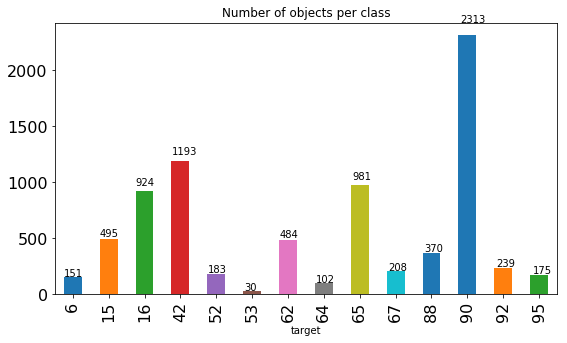

In [32]:
ax = metadata.groupby("target").count().object_id.plot(
    kind="bar", fontsize=16,
    figsize=(9, 5),
    title="Number of objects per class");
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))

The number of objects per class is not balanced

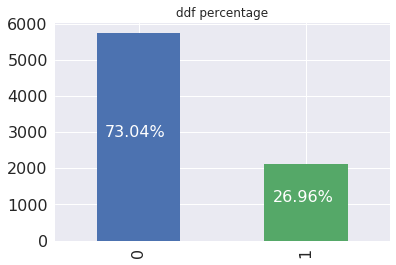

In [338]:
ax = metadata.ddf.value_counts().plot.bar(fontsize=16, title="ddf percentage");
for p in ax.patches:
    ax.annotate(f"{round(p.get_height()*100/metadata.shape[0], 2)}%", (p.get_x()-0.2+p.get_width()/2, p.get_height() / 2), color="w", fontsize=16)

73.04% of object have very uncertain flux values

In [355]:
stats = metadata[["target", "ddf", "object_id"]].groupby(["target", "ddf"]).sum()
stats = stats.reset_index(level=["target", "ddf"])
ddf0 = stats[stats.ddf==0]
ddf1 = stats[stats.ddf==1]
ddf1[(ddf1.object_id.values/ddf0.object_id.values)>.05]

,target,ddf,object_id


No class has a 5% of its object with ddf defined. Uncertainty has to be taken into account carefully for each class

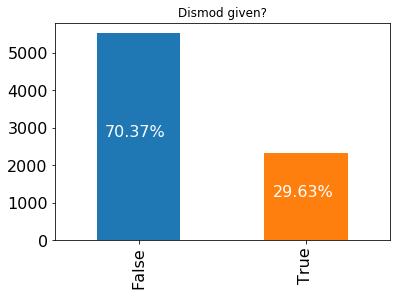

In [72]:
ax = metadata.distmod.isna().value_counts().plot.bar(fontsize=16, title="Dismod given?");
for p in ax.patches:
    ax.annotate(f"{round(p.get_height()*100/metadata.shape[0], 2)}%", (p.get_x()-0.2+p.get_width()/2, p.get_height() / 2), color="w", fontsize=16)

So many missing values for distmod? How to handle this?

In [113]:
colors = ['purple', 'blue', 'green', 'orange', 'red', 'black']

In [186]:
def plot_target_sample(target):
    plt.figure(figsize=(16, 3))
    for i in range(4):
        ax = plt.subplot(1, 4, i+1)
        ax.set_title(f"{target_types[target]}({target})")
        oid = metadata[metadata.target==target].object_id.values[i]
        o = training_set[training_set.object_id==oid]
        for i in range(6):
            ax.errorbar(o[o.passband==i].mjd,
                         o[o.passband==i].flux, ecolor="r", fmt="o", color=colors[i],
                         yerr=o[o.passband==i].flux_err)

In [192]:
targets = list(target_types.keys())

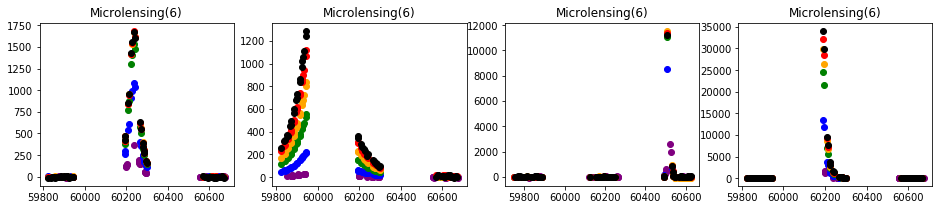

In [194]:
plot_target_sample(targets[0])

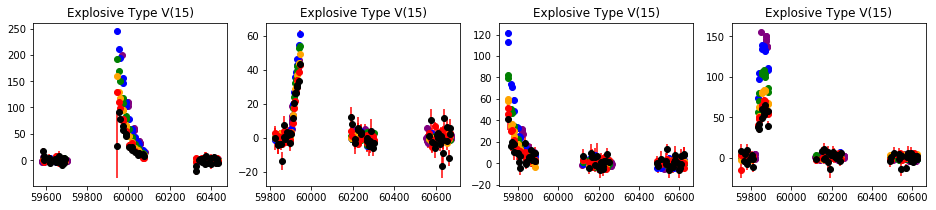

In [195]:
plot_target_sample(targets[1])

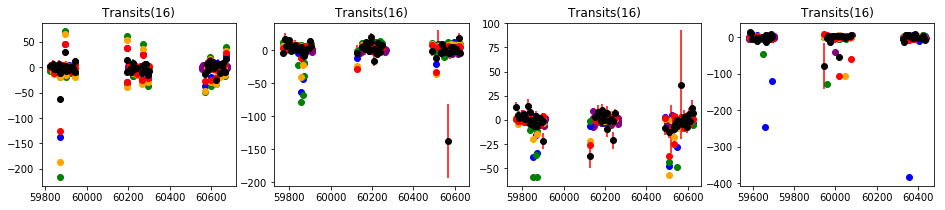

In [196]:
plot_target_sample(targets[2])

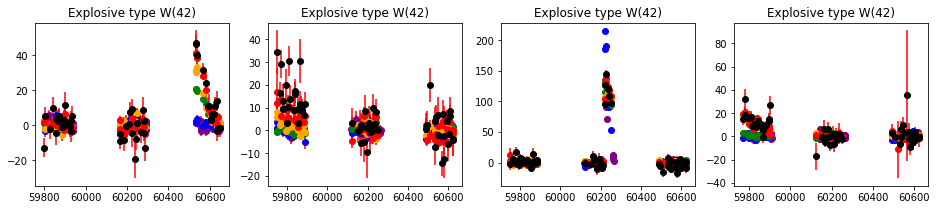

In [197]:
plot_target_sample(targets[3])

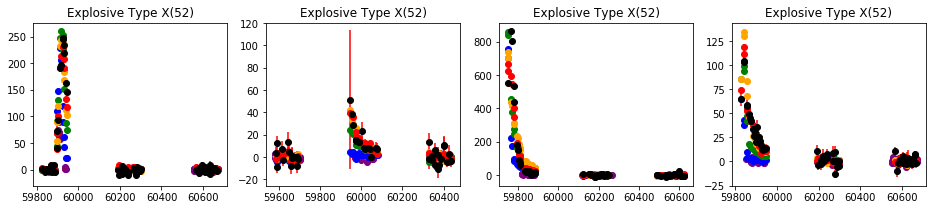

In [198]:
plot_target_sample(targets[4])

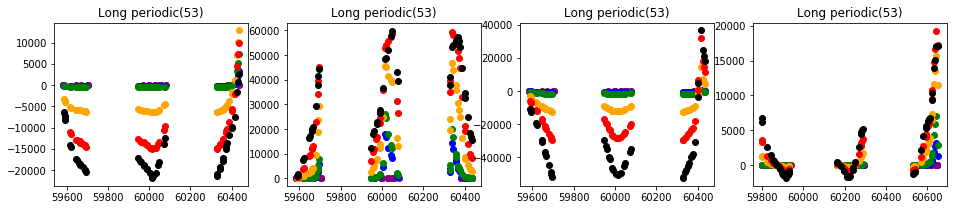

In [199]:
plot_target_sample(targets[5])

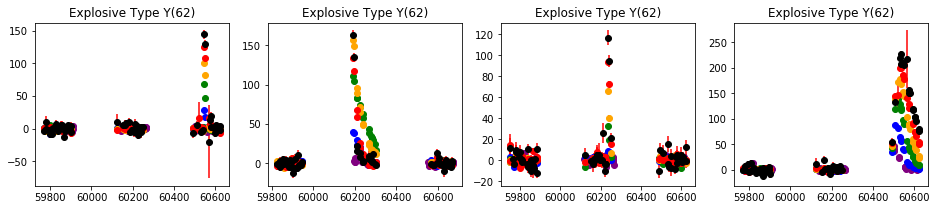

In [200]:
plot_target_sample(targets[6])

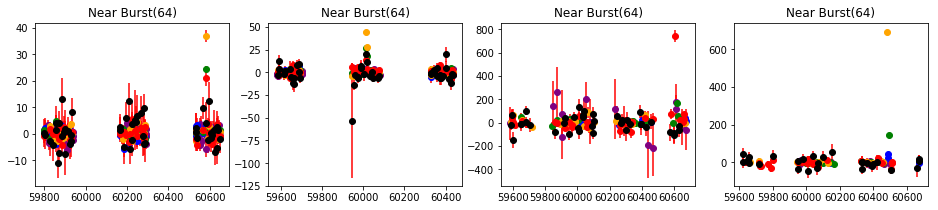

In [201]:
plot_target_sample(targets[7])

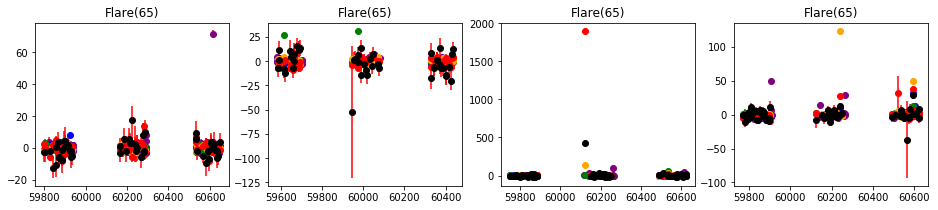

In [202]:
plot_target_sample(targets[8])

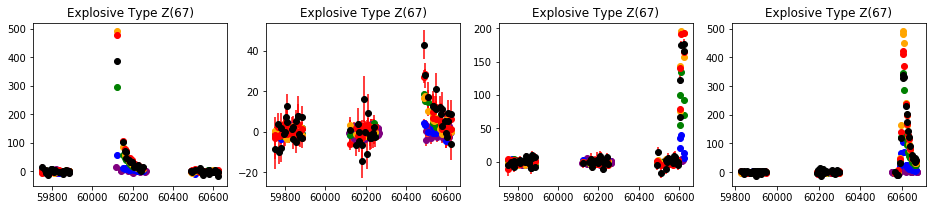

In [203]:
plot_target_sample(targets[9])

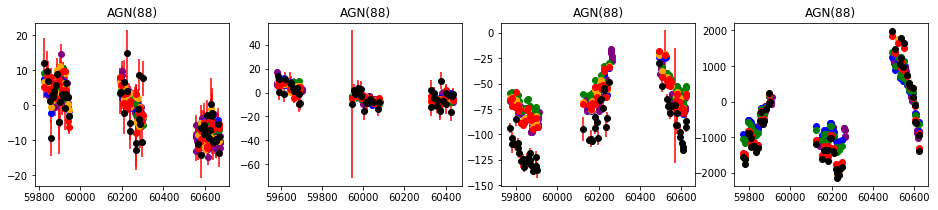

In [204]:
plot_target_sample(targets[10])

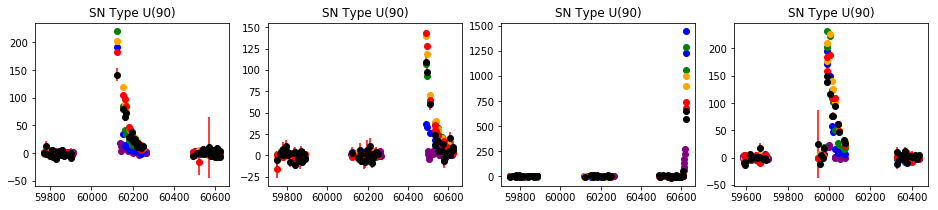

In [205]:
plot_target_sample(targets[11])

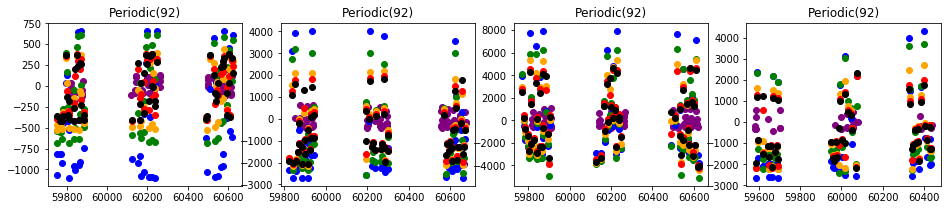

In [206]:
plot_target_sample(targets[12])

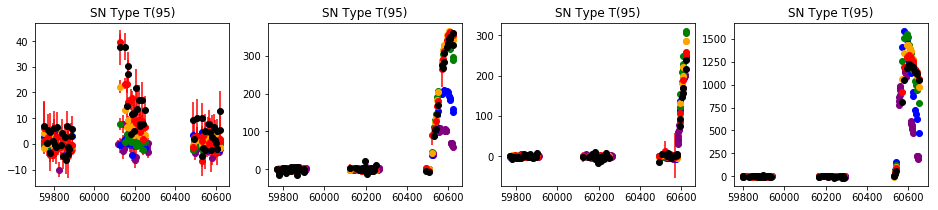

In [207]:
plot_target_sample(targets[13])

In [365]:
for t in targets:
    object_ids = metadata[metadata.target==t].object_id.values[:3]
    o1 = training_set[training_set.object_id==object_ids[0]].mjd.values
    o2 = training_set[training_set.object_id==object_ids[1]].mjd.values
    print(t, np.array_equal(o1, o2), len(o1))

6 True 350
15 False 255
16 False 350
42 False 330
52 False 350
53 True 255
62 False 351
64 False 330
65 False 330
67 True 352
88 False 350
90 False 351
92 False 352
95 False 352


* Objects from the classes 6 are observed at the same mjd. The same for class 53 and 67. 
* Objects from others do not have the same mjd series.
* Objects do have the same mjd observations, even objects in the same class   

**How to handle missing mjd?**

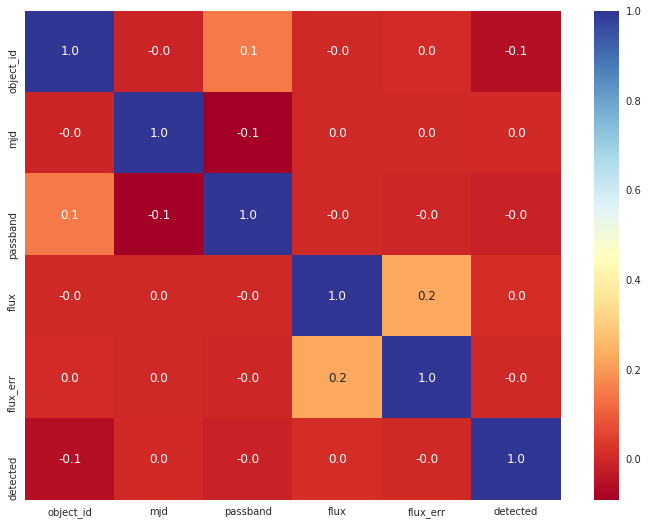

In [328]:
plt.figure(figsize=(12,9))
sbn.heatmap(training_set.corr(), annot=True, fmt=".1f", cmap="RdYlBu");

no correlated attribute in the training set

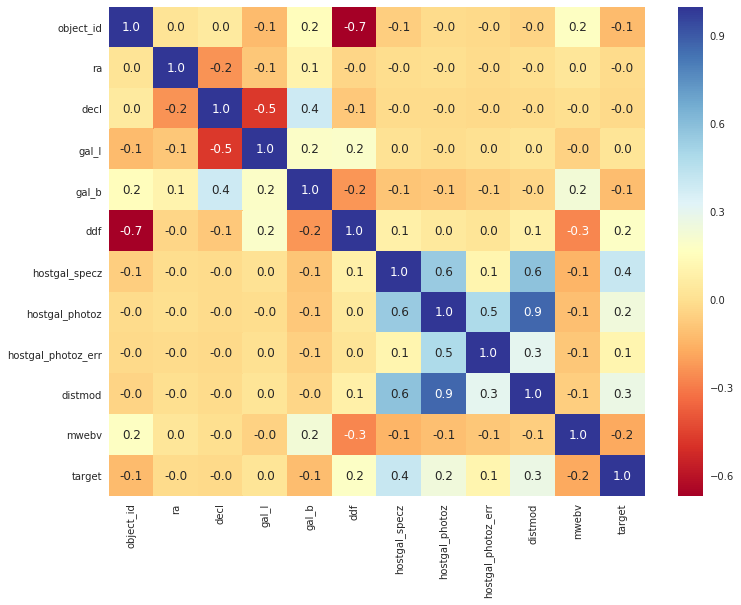

In [330]:
plt.figure(figsize=(12,9))
sbn.heatmap(metadata.corr(), annot=True, fmt=".1f", cmap="RdYlBu");

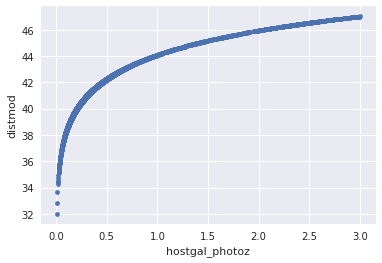

In [366]:
ds_distmod = metadata[~metadata.distmod.isna()]
ds_distmod.plot.scatter(x="hostgal_photoz", y="distmod");

Filling missing distmod using an approximation of the above fonction can be a good idea

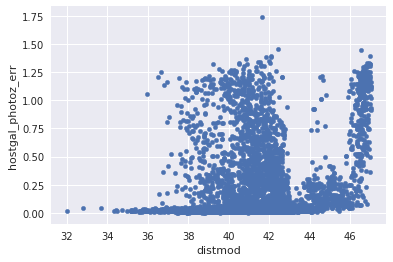

In [334]:
ds_distmod = metadata[~metadata.distmod.isna()]
ds_distmod.plot.scatter(x="distmod", y="hostgal_photoz_err");

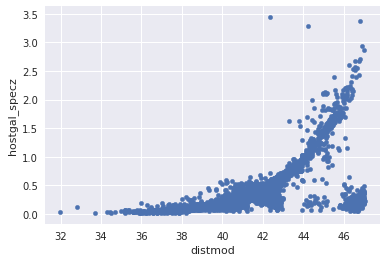

In [368]:
ds_distmod = metadata[~metadata.distmod.isna()]
ds_distmod.plot.scatter(x="distmod", y="hostgal_specz");

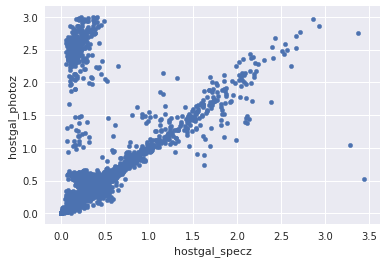

In [337]:
metadata.plot.scatter(x="hostgal_specz", y="hostgal_photoz");

May be hostgal_specz can be predicted from hostgal_photoz and hostgal_photoz_err